### Solution for https://github.com/Automating-GIS-processes-2022/Exercise-4/blob/main/Exercise-4-problem-1.ipynb

In [1]:
import os
os.environ['USE_PYGEOS'] = '0'


from pathlib import Path
import mapclassify
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

In [2]:
NOTEBOOK_PATH = Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data"

### Problem 1: Join accessibility datasets into a grid and visualise the data on a map (10 points)

#### a) Read the grid cell data set

In [3]:
grid = gpd.read_file(DATA_DIRECTORY / "YKR_grid_EPSG3067.gpkg")
grid = grid.set_index("YKR_ID")
grid.head()

,geometry
YKR_ID,
5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


<AxesSubplot: >

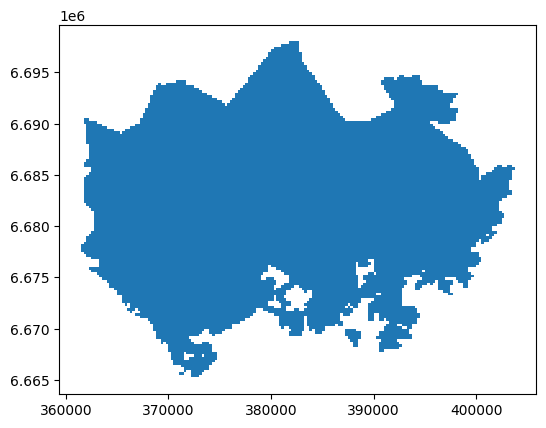

In [4]:
grid.plot()

#### b) Read the travel time data sets and join them to the grid cells

In [5]:
travel_times_itis = pd.read_csv("data/travel_times_to_5944003_Itis.txt", sep=";", usecols=["from_id", "pt_r_t", "car_r_t"], index_col="from_id")
travel_times_itis = travel_times_itis.loc[(travel_times_itis != -1).all(axis=1)]
travel_times_itis = travel_times_itis.rename(columns={
    "pt_r_t": "pt_r_t_Itis",
    "car_r_t": "car_r_t_Itis",
})
travel_times_itis.head()

,car_r_t_Itis,pt_r_t_Itis
from_id,,
5785640,50,132
5785641,51,135
5785642,58,137
5785643,57,141
5787544,50,125


In [6]:
travel_times_myyrmanni = pd.read_csv("data/travel_times_to_5902043_Myyrmanni.txt", sep=";", usecols=["from_id", "pt_r_t", "car_r_t"], index_col="from_id")
travel_times_myyrmanni = travel_times_myyrmanni.loc[(travel_times_myyrmanni != -1).all(axis=1)]
travel_times_myyrmanni = travel_times_myyrmanni.rename(columns={
    "car_r_t": "car_r_t_Myyrmanni",
    "pt_r_t": "pt_r_t_Myyrmanni",
})
travel_times_myyrmanni.head()

,car_r_t_Myyrmanni,pt_r_t_Myyrmanni
from_id,,
5785640,39,90
5785641,39,93
5785642,47,95
5785643,51,99
5787544,38,83


In [7]:
travel_times_itis.join(travel_times_myyrmanni)

,car_r_t_Itis,pt_r_t_Itis,car_r_t_Myyrmanni,pt_r_t_Myyrmanni
from_id,,,,
5785640,50,132,39,90
5785641,51,135,39,93
5785642,58,137,47,95
5785643,57,141,51,99
5787544,50,125,38,83
...,...,...,...,...
6016697,59,81,53,97
6016698,60,79,54,95
6016699,62,81,56,97


In [8]:
grid = grid.join(travel_times_itis.join(travel_times_myyrmanni), how="inner")
grid.head()

,geometry,car_r_t_Itis,pt_r_t_Itis,car_r_t_Myyrmanni,pt_r_t_Myyrmanni
5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",50,132,39,90
5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",51,135,39,93
5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",58,137,47,95
5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",57,141,51,99
5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",50,125,38,83


In [9]:
# NON-EDITABLE TEST CELL
import geopandas
assert type(grid) == geopandas.geodataframe.GeoDataFrame, "Output should be a geodataframe."

In [10]:
# NON-EDITABLE TEST CELL
# Check that the merged output have (at least) the necessary columns
required_columns = ['pt_r_t_Itis', 'car_r_t_Itis', 'pt_r_t_Myyrmanni', 'car_r_t_Myyrmanni', 'geometry']

assert all(column in grid.columns for column in required_columns), "Couldn’t find all required columns."

In [11]:
# NON-EDITABLE TEST CELL
# Check that -1 values are not present in the columns
for shopping_centre in ("Itis", "Myyrmanni"):
    for column in ("car_r_t", "pt_r_t"):
        assert -1 not in grid[f"{column}_{shopping_centre}"], "NoData values (-1) should be removed from the data!"

#### c) Classify the travel times into five-minute intervals

In [12]:
classbreaks = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

In [13]:
grid["pt_r_t_cl_Itis"] = grid[["pt_r_t_Itis"]].apply(mapclassify.UserDefined.make(bins=classbreaks))
grid["pt_r_t_cl_Myyrmanni"] = grid[["pt_r_t_Myyrmanni"]].apply(mapclassify.UserDefined.make(bins=classbreaks))

In [14]:
grid["car_r_t_cl_Itis"] = grid[["car_r_t_Itis"]].apply(mapclassify.UserDefined.make(bins=classbreaks))
grid["car_r_t_cl_Myyrmanni"] = grid[["car_r_t_Myyrmanni"]].apply(mapclassify.UserDefined.make(bins=classbreaks))

In [15]:
grid.head()

,geometry,car_r_t_Itis,pt_r_t_Itis,car_r_t_Myyrmanni,pt_r_t_Myyrmanni,pt_r_t_cl_Itis,pt_r_t_cl_Myyrmanni,car_r_t_cl_Itis,car_r_t_cl_Myyrmanni
5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",50,132,39,90,12,12,9,7
5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",51,135,39,93,12,12,10,7
5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",58,137,47,95,12,12,11,9
5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",57,141,51,99,12,12,11,10
5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",50,125,38,83,12,12,9,7


In [16]:
# NON-EDITABLE TEST CELL
# Check the output
print("travel times by public transport:")
grid[['pt_r_t_Itis', 'pt_r_t_cl_Itis']].head()

travel times by public transport:


,pt_r_t_Itis,pt_r_t_cl_Itis
5785640,132,12
5785641,135,12
5785642,137,12
5785643,141,12
5787544,125,12


In [17]:
# NON-EDITABLE TEST CELL
# Check the output
print("Travel times by car:")
grid[["car_r_t_Myyrmanni", "car_r_t_cl_Myyrmanni"]].head()

Travel times by car:


,car_r_t_Myyrmanni,car_r_t_cl_Myyrmanni
5785640,39,7
5785641,39,7
5785642,47,9
5785643,51,10
5787544,38,7


<AxesSubplot: >

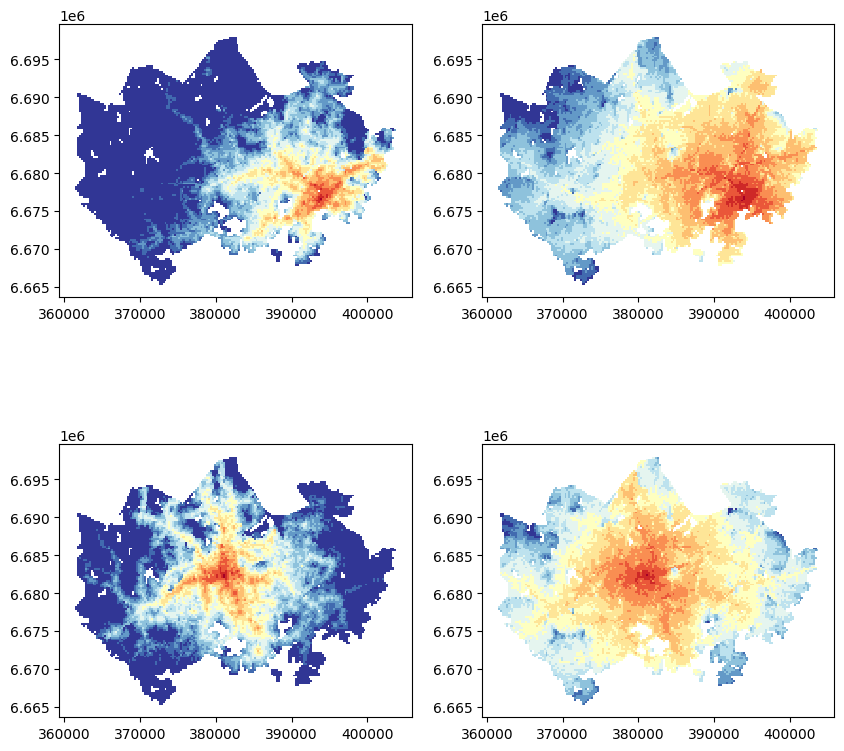

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
grid.plot(column="pt_r_t_cl_Itis", cmap="RdYlBu", ax=axs[0, 0])
grid.plot(column="car_r_t_cl_Itis", cmap="RdYlBu", ax=axs[0, 1])
grid.plot(column="pt_r_t_cl_Myyrmanni", cmap="RdYlBu", ax=axs[1, 0])
grid.plot(column="car_r_t_cl_Myyrmanni", cmap="RdYlBu", ax=axs[1, 1])

In [19]:
fig.savefig(DATA_DIRECTORY / "shopping_centre_accessibility.png") 

In [20]:
# NON-EDITABLE TEST CELL
# Check that output figure file exists
assert (DATA_DIRECTORY / "shopping_centre_accessibility.png").exists()